# 다나와 제품 가격 비교 분석 맛보기
1. 데이터 수집해보기 (한페이지 크롤링)
    1. 반복문으로 한페이지 제품정보 모두 가져오기
    1. 제품정보 가져오는 함수 만들어 보기
    1. 함수 테스트 작동 확인
1. 여러 페이지 (10 page) 데이터 수집
    1. 다나와 검색 URL을 만들어주는 함수 만들어보기
    1. 크롤링 결과 저장
1. 데이터 분석하기
    1. 가격, 리뷰수, 포인트 순으로 정렬해보기
    1. 가격, 포인트, 리뷰수 평균, 최고, 최소값 알아보기
1. 차트 그려보기
    1. 회사별 가격 boxplot 차트 그려보기
    1. TOP 10 회사 점유율 알아보기
    



# 0. 들어가기에 앞서 
 - 함수 만들어서 보기
 - range 함수 사용법
 - 반복문 실습 
 

In [ ]:
#함수만들기
def 함수명:
    코드입력
    return

In [2]:
def a():
    # 코드
    return 0

print(a())

0


In [6]:
p = range(1,10) # 리스트 형태 [0,1,2,3,4]를 함수화
print(p)

for i in p:
    print(i)

range(1, 10)
1
2
3
4
5
6
7
8
9


# 1. 데이터 수집 해보기 (한 페이지 크롤링)

### 다나와 검색 페이지 접속

In [8]:
from selenium import webdriver
from bs4 import BeautifulSoup

### 다나와 검색 웹 페이지에서 상품 정보 가져오기

In [9]:
url = "http://search.danawa.com/dsearch.php?k1=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&module=goods&act=dispMain"
driver = webdriver.Chrome('./driver/chromedriver.exe')

In [10]:
driver.get(url)

In [12]:
html = driver.page_source
print(html)

<!DOCTYPE html><html xmlns="http://www.w3.org/1999/xhtml" xml:lang="ko" lang="ko" class=" js no-touch"><head>
<title>무선청소기 쇼핑검색 종합정보 :: 행복쇼핑의 시작 ! 다나와 (가격비교) - Danawa.com</title>
<!-- <meta http-equiv="Content-Type" content="text/html; charset=utf-8"/> -->
<meta http-equiv="Content-Type" content="text/html; charset=utf-8" /><meta http-equiv="X-UA-Compatible" content="IE=Edge" /><meta name="Title" content="무선청소기 쇼핑검색 종합정보 :: 행복쇼핑의 시작 ! 다나와 (가격비교) - Danawa.com" />
<meta name="Description" content="무선청소기 최저가 상품 가격비교와 함께 사용기, 뉴스, 리뷰, 구매가이드, 중고시세 등의 쇼핑 추천정보를 풍부하게 제공합니다." />
<meta name="Keywords" content="무선청소기, 상품 추천, 구매, 구입, 쇼핑 검색, 가격 비교, 중고, 좋은, 뉴스, 사용기, 리뷰, 블로그, 최저가" />
<meta name="robots" content="nofollow" />
<meta property="og:title" content="쇼핑검색 종합정보" />
<meta property="og:image" content="http://img.danawa.com/new/tour/img/logo/sns_danawa.jpg" />
<meta property="og:description" content="무선청소기" />
<meta content="width=1280" name="viewport" />
<link rel="shortcut icon" href="//img.dan

In [13]:
#상품정보
prod_items= soup.select('태그읾.클래스이름')

In [14]:
prod_items = soup.select('li.prod_item')
print(len(prod_items))

38


In [16]:
prod_items = soup.select('.main_prodlist> .product_list > li.prod_item')
print(len(prod_items))

30


In [22]:
item=prod_items[1]

#회사명 모델명 가져오기
title = item.select('p.prod_name >a')[0].text.strip()
print(title)
company = title.split(' ', 1)
company=title[0]
model = title[1]
print(company)
print(model)

샤오미 드리미 V10
샤
오


In [36]:
#가격정보
price = item.select('p.price_sect > a> strong')[0].text.replace(',','')
print(type(price), price)

<class 'str'> 171760


In [ ]:
price="매진"
try:
    price = int(price)
exe

In [ ]:
print(pro)

In [40]:
### 크롬 개발자 도구를 이용하여 정확하게 정보 가져오기 실습

# 대표 엘리먼트 
prod_items = soup.select('.main_prodlist > .product_list > .prod_item')

for prod_item in prod_items:
    # 텍스트 
    title = prod_items[0].select('p.prod_name > a')[0].text.strip()
    title_info = title.split(' ', 1)
    company = title_info[0]
    model = title_info[1]

    # 숫자형
    point = prod_items[0].select('div.point_num > strong')[0].text.strip()
    review_count = prod_items[0].select('div.cnt_opinion > a > strong')[0].text.strip()
    price = prod_items[0].select('p.price_sect > a > strong')[0].text.strip().replace(",","")

    print(company, model, point, review_count, price)

델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000


In [39]:
print(len(prod_items))

30


In [44]:
for prod_item in prod_items:
    # 텍스트 
    try:
        title = prod_items[0].select('p.prod_name > a')[0].text.strip()
        title_info = title.split(' ', 1)
        company = title_info[0]
        model = title_info[1]
    except:
        company = ''
        model = ''
        
    # 숫자형
    try:
        point = prod_items[0].select('div.point_num > strong')[0].text.strip()
    except:
        point = 0
    
    try:
        review_count = prod_items[0].select('div.cnt_opinion > a > strong')[0].text.strip()
    except:
        review_count = 0
    try:
        price = prod_items[0].select('p.price_sect > a > strong')[0].text.strip().replace(",","")
    except:
        price = 0
        
    print(company, model, point, review_count, price)
    #prod_datas.append([company, model, point])

델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000
델로라 V11 파워 300W 94 59 139000


### 상품명, 포인트, 리뷰수, 가격 정보 가져오기 실습

In [33]:
point = item.select('div.point_num > strong')[0].text
print(point)
print(type(point))
#str => int
point = int(point)
print(type(point))

93
<class 'str'>
<class 'int'>


In [32]:
review_count = int(item.select('div,cnt_opinion > a> strong')[0].text
print(point)







이미지보기
							



샤오미 드리미 V10


상세 스펙

핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 25.2V / 헤파필터 / H12급 / 5단계여과 / 흡입력: 140AW / 흡입력: 22000Pa / 먼지통용량: 0.5L / 충전시간: 3시간30분 / 사용시간: 1시간 / 용량: 2500mAh / 브러쉬: 바닥, 솔형, 틈새, 침구, 연장관 / 거치대 / 무게: 1.5kg / 색상:화이트 / 소비전력: 450W 


관련용품▶AVS5



등록월
2019.10


상품의견







93점
														


														(410건)
													



관심상품
관심상품




상품분류

생활가전 > 청소기 > 핸디/스틱 











										13몰
																					
상품비교






171,760원										

가격정보 더보기





																							해외구매																						








### 반복문으로 검색 결과의 1페이지에 대한 상품 정보 추출
~~~
prod_data = []
for prod_item in prod_items:
    try: 
       
    except:
       
    prod_data.append([company, model, point, review_count, price])
~~~


In [45]:
prod_data = []
for prod_item in prod_items:
    try: 
       
    except:
       
    prod_data.append([company, model, point, review_count, price])


IndentationError: expected an indented block (<ipython-input-45-acdde1c987d0>, line 5)

In [ ]:
print(len(prod_data))


In [ ]:
print(prod_data)

### 반복문으로 검색 결과의 상품 정보 추출 하는 함수 만들어보기
~~~
def get_prod_items(prod_items):
    prod_data = []     
    return prod_data;
~~~

In [85]:
def get_prod_items(prod_items):
    prod_datas=[]
    for prod_item in prod_items:
        # 텍스트 
        try:
            title = prod_item.select('p.prod_name > a')[0].text.strip()
            title_info = title.split(' ', 1)
            company = title_info[0]
            model = title_info[1]
        except:
            company = ''
            model = ''

        # 숫자형
        try:
            point = int(prod_item.select('div.point_num > strong')[0].text.strip())
        except:
            point = 0

        try:
            review_count = int(prod_item.select('div.cnt_opinion > a > strong')[0].text.strip())
        except:
            review_count = 0
        try:
            price = int(prod_item.select('p.price_sect > a > strong')[0].text.strip().replace(",",""))
        except:
            price = 0

        print(company, model, point, review_count, price)
        prod_datas.append([company, model, point, review_count, price])
        
    return prod_datas

In [88]:
# 상품 정보를 가져오는 함수 테스트
prod_data = get_prod_items(prod_items)
print(len(prod_data))

지웰 벤투스 아쿠아 프로 91 147 359100
로엘 듀스핀2 87 327 64900
차량용 무선 청소기 VC003 (해외구매) 0 0 37920
LG전자 코드제로 T9 93 42 800840
DIBEA M500 터보 95 50 162240
홈마블 H80 0 0 42560
다이슨 V10 앱솔루트 엑스트라 96 488 715430
다이슨 V10 플러피 97 0 615330
유행코리아 더쎈 유무선 청소기 88 404 72950
DIBEA F20 맥스 94 568 225130
오토봇 V2 휴대용 진공 청소기 ABV003 (해외구매) 100 2 66340
삼성전자 제트 VS20T9278S7 0 0 1287000
보쉬 GAS18V-1 93 249 62920
샤오미 WXCDJ01SWDK 94 64 78990
블랙앤데커 PV1820BK 92 142 86990
DIBEA M500 퀀텀 94 233 255850
일렉트로룩스 퓨어 Q9 PQ91-3OB 94 58 306300
일렉트로룩스 에르고라피도 파워프로 ZB3411 96 38 236940
일렉트로룩스 퓨어 F9 PF91-6BMF 100 5 411980
포커스힛 오토라 차량용 무선 청소기 ATUORA-2019-07 0 0 74680
신일산업 롤링스턴 SVC-C1012WS 89 25 93520
신일 롤링스턴 SDC-EQ900 89 39 91630
듀플렉스 DP-485VC 91 0 17150
다이슨 V10 카본파이버 프로 96 55 785970
삼성전자 제트 VS20T9278S3CS 0 0 0
유니맥스 UVC-1688 87 362 17970
티피오스 TVC-3000 100 3 98000
DIBEA ALLNEW22000 93 634 179000
툴앤툴 코드프리 P10 95 158 128990
캐치웰 VX11 96 10 173960
30


# 2. 여러 페이지에 걸친 상품 정보 수집
~~~
def get_search_page_url(keyword, page):
    return 
    
keyword = '무선청소기'
page = 2
url = get_search_page_url(keyword, page)
print(url)

for page in range(1, total_page + 1):
    print(get_search_page_url)
~~~

In [89]:
keyword="무선청소기"
page=4
url = "http://search.danawa.com/dsearch.php?query={}&page={}&limit=30&sort=saveDESC&list=list&boost=true&addDelivery=N&tab=goods&tab=goods"
format_url = url.format(keyword, page)
print(format_url)

http://search.danawa.com/dsearch.php?query=무선청소기&page=4&limit=30&sort=saveDESC&list=list&boost=true&addDelivery=N&tab=goods&tab=goods


In [90]:
for page in range(1, 10):
    url="http://search.danawa.com/dsearch.php?query={}&page={}&limit=30&sort=saveDESC&list=list&boost=true&addDelivery=N&tab=goods&tab=goods"
    format_url=url.format(keyword, page)
    print(format_url)

http://search.danawa.com/dsearch.php?query=무선청소기&page=1&limit=30&sort=saveDESC&list=list&boost=true&addDelivery=N&tab=goods&tab=goods
http://search.danawa.com/dsearch.php?query=무선청소기&page=2&limit=30&sort=saveDESC&list=list&boost=true&addDelivery=N&tab=goods&tab=goods
http://search.danawa.com/dsearch.php?query=무선청소기&page=3&limit=30&sort=saveDESC&list=list&boost=true&addDelivery=N&tab=goods&tab=goods
http://search.danawa.com/dsearch.php?query=무선청소기&page=4&limit=30&sort=saveDESC&list=list&boost=true&addDelivery=N&tab=goods&tab=goods
http://search.danawa.com/dsearch.php?query=무선청소기&page=5&limit=30&sort=saveDESC&list=list&boost=true&addDelivery=N&tab=goods&tab=goods
http://search.danawa.com/dsearch.php?query=무선청소기&page=6&limit=30&sort=saveDESC&list=list&boost=true&addDelivery=N&tab=goods&tab=goods
http://search.danawa.com/dsearch.php?query=무선청소기&page=7&limit=30&sort=saveDESC&list=list&boost=true&addDelivery=N&tab=goods&tab=goods
http://search.danawa.com/dsearch.php?query=무선청소기&page=8&limit=

In [ ]:
driver = webdriver.Chrome('./driver/chromedriver.exe')

In [92]:
import time

prod_data_total = []

url="http://search.danawa.com/dsearch.php?query={}&page={}&limit=30&sort=saveDESC&list=list&boost=true&addDelivery=N&tab=goods&tab=goods"
keyword = "무선청소기"

for page in range(1,6):
    #page에 맞게 url 만들어주는 부분
    format_url = url.format(keyword, page)
    driver.get(format_url)
    time.sleep(5)
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser') # 텍스트 페이지 -> 구조화된 데이터 형태 변환
    #대표엘리먼트
    prod_items = soup.select('.main_prodlist > .product_list > .prod_item')
    prod_item_list = get_prod_items(prod_items)
    prod_data_total = prod_data_total+prod_item_list # 페이지 상품정보 30개 추기
    

델로라 V11 파워 300W 94 59 139000
샤오미 드리미 V10 93 410 171760
다이슨 V11 220 에어와트 CF+ 98 0 909650
원더스리빙 다이나킹 Z9 96 36 299000
샤오미 SHUNZAO 차량용 무선청소기 2세대 Z1 PRO (해외구매) 90 227 48400
샤오미 SHUNZAO Z11 PRO 100 13 172050
LG전자 코드제로 A9 A978 97 327 911200
LG전자 코드제로 A9 A951 95 606 881080
삼성전자 제트 VS20R9078S2 95 213 836980
다이슨 V8 플러피 95 368 409500
일렉트로룩스 ZB3302AK 97 0 137510
샤오미 SHUNZAO Z11 85 40 151810
샤오미 SHUNZAO 차량용 무선청소기 2세대 Z1 (해외구매) 89 131 22410
DIBEA D18 92 0 112990
다이슨 V10 카본파이버 96 0 720990
LG전자 코드제로 A9 A938 97 398 654790
LG전자 코드제로 A9 A947 95 99 819470
샤오미 드리미 V9 94 0 298000
LG전자 코드제로 A9 A958 96 970 906460
휴스톰 HS-10000 96 0 138990
삼성전자 제트 VS20R9043SA 95 84 629100
삼성전자 제트 VS19R1004BF 95 327 420630
LG전자 코드제로 A9S A9700 0 0 1175040
LG전자 코드제로 A9 A948 95 342 688500
샤오미 드리미 V10P 100 5 298000
델첸 퍼스널 무선 미니 차량용 핸디청소기 DC-C01 87 14 66900
다이슨 V8 슬림 플러피+ 98 254 547200
삼성전자 뉴파워건 130 92 181 318560
DIBEA DW200 90 0 65680
샤오미 SWDK-D260 94 777 104500
일렉트로룩스 퓨어 Q9 PQ91-2OG 95 71 297620
다이슨 V11 플러피 98 401 726750
다이슨 V10 앱솔

WebDriverException: Message: chrome not reachable
  (Session info: chrome=80.0.3987.132)
  (Driver info: chromedriver=2.38.552522 (437e6fbedfa8762dec75e2c5b3ddb86763dc9dcb),platform=Windows NT 10.0.17763 x86_64)


In [ ]:
prod_data_total

In [ ]:
print(len(prod_data_total))

## 수집 데이터 저장 
~~~
'회사명', '제품', '포인트', '리뷰수', '가격'
~~~

In [98]:
import pandas as pd
data = pd.DataFrame(prod_data_total)
data.columns = {'회사명', '제품', '포인트', '리뷰수', '가격'}
data.to_excel('./files/danawa_final.xlsx', index=False)

# 3. 데이터 분석하기

In [119]:
# 저장 데이터 불러오기
data = pd.DataFrame(prod_data_total)
data.columns = {'회사명', '제품', '포인트', '리뷰수', '가격'}
data.to_excel('./files/danawa_final.xlsx', index=False)
danawa_data=pd.read_excel("./files/danawa_final.xlsx")

danawa_data

,리뷰수,가격,제품,포인트,회사명
0,델로라,V11 파워 300W,94,59,139000
1,샤오미,드리미 V10,93,410,171760
2,다이슨,V11 220 에어와트 CF+,98,0,909650
3,원더스리빙,다이나킹 Z9,96,36,299000
4,샤오미,SHUNZAO 차량용 무선청소기 2세대 Z1 PRO (해외구매),90,227,48400
...,...,...,...,...,...
115,삼성전자,제트 VS20R9044SA,96,205,709750
116,DIBEA,TSX-25000A,92,54,225000
117,머레이,핸디형 무선청소기 HK-6030,91,32,38140
118,아낙,ANA-1930,90,12,170810


### 가격, 리뷰수, 포인트 순으로 정렬해보기 
 - sort_values

In [108]:
top_list = danawa_data.sort_values(["가격"], ascending=False)
top_list.head(10)

,리뷰수,가격,제품,포인트,회사명
117,머레이,핸디형 무선청소기 HK-6030,91,32,38140
65,일렉트로룩스,퓨어 Q9 PQ91-3EM,92,26,327700
67,일렉트로룩스,퓨어 Q9 PQ91-3BW,91,46,417480
30,일렉트로룩스,퓨어 Q9 PQ91-2OG,95,71,297620
25,델첸,퍼스널 무선 미니 차량용 핸디청소기 DC-C01,87,14,66900
48,삼성전자,파워스틱 VS60M6010KG,92,194,159980
109,삼성전자,파워스틱 VS60K6081KD,97,22,221450
114,삼성전자,파워스틱 VS60K6081KC,92,113,239000
104,삼성전자,파워스틱 VS03R6523J2,87,12,280000
94,카렉스,파워스톰 미니 무선청소기,92,77,89890


### 가격, 포인트, 리뷰수 평균, 최고, 최소값 알아보기
 - mean, max, min

In [103]:
top_list = danawa_data.sort_values(["가격", "포인트", "리뷰수"], ascending=False)
top_list.head(10)

,리뷰수,가격,제품,포인트,회사명
117,머레이,핸디형 무선청소기 HK-6030,91,32,38140
65,일렉트로룩스,퓨어 Q9 PQ91-3EM,92,26,327700
67,일렉트로룩스,퓨어 Q9 PQ91-3BW,91,46,417480
30,일렉트로룩스,퓨어 Q9 PQ91-2OG,95,71,297620
25,델첸,퍼스널 무선 미니 차량용 핸디청소기 DC-C01,87,14,66900
48,삼성전자,파워스틱 VS60M6010KG,92,194,159980
109,삼성전자,파워스틱 VS60K6081KD,97,22,221450
114,삼성전자,파워스틱 VS60K6081KC,92,113,239000
104,삼성전자,파워스틱 VS03R6523J2,87,12,280000
94,카렉스,파워스톰 미니 무선청소기,92,77,89890


In [ ]:
### 가격 포인트 리뷰스 평균 최고 최솟값

In [110]:
price_mean = danawa_data['가격'].mean()
print(price_mean)
print_max=danawa_data['가격'].max()
print(price_max)
print_min = danawa_data['가격'].min()
print(price_min)

TypeError: Could not convert V11 파워 300W드리미 V10V11 220 에어와트 CF+다이나킹 Z9SHUNZAO 차량용 무선청소기 2세대 Z1 PRO (해외구매)SHUNZAO Z11 PRO코드제로 A9 A978코드제로 A9 A951제트 VS20R9078S2V8 플러피ZB3302AKSHUNZAO Z11SHUNZAO 차량용 무선청소기 2세대 Z1 (해외구매)D18V10 카본파이버코드제로 A9 A938코드제로 A9 A947드리미 V9코드제로 A9 A958HS-10000제트 VS20R9043SA제트 VS19R1004BF코드제로 A9S A9700코드제로 A9 A948드리미 V10P퍼스널 무선 미니 차량용 핸디청소기 DC-C01V8 슬림 플러피+뉴파워건 130DW200SWDK-D260퓨어 Q9 PQ91-2OGV11 플러피V10 앱솔루트 플러스에르고라피도 프로 플러스 ZB3113AK오엘라 네오스핀 OBC-AW09WH제트 VS15R8577S5로이드미 제로제트 VS20R9048SB에르고라피도 파워프로 ZB3414AK드리미 V8SWDK KC101제트 VS20R9044SCHS-9000로이드미 F8제트 VS20R9078S3V7 플러피V11 컴플리트M500 프로파워스틱 VS60M6010KG아쿠아젯 AM-5600BMHS-11000에이스 맥스V10 모터헤드VC-H71V8 앱솔루트V8 카본파이버코드제로 터보2.0 S87GMWAST-009NEW F7 플러스KAC-7000KAC-7100코드제로 S86V7 플러피 플러스바로바로 MC-B250V8 플러피 프로퓨어 Q9 PQ91-3EMV8 앱솔루트 엑스트라퓨어 Q9 PQ91-3BWUVC-1685AV8 모터헤드 헤파에르고라피도 플러스 ZB3105AKV8 앱솔루트 플러스V8 플러피 헤파C17V8 앱솔루트 프로F20 프로OTOCINC-700B더쎈 SVC-ECO350코드제로 A9 A940코드제로 A9 A950차량용 청소기 ICL-V01뉴파워건 150파워건 150에르고라피도 ZB3111KAC-5500라피도 ZB6108울트라파워 ZB5022울트라파워 ZB5021차량용 무선 청소기 (해외구매)코드제로 A9 A960V008 프로VH806PDK-12000N코드제로 A9 A930파워스톰 미니 무선청소기V6 코드프리 플러스오비큠V10 애니멀에어포스 라이트 TY6545KL제트 VS20R9043QA디어마 VC20S드리미 CCZB6114제트 VS15R8577S5CW파워스틱 VS03R6523J2PV1820CEXTSVC-1019LV10 앱솔루트에르고라피도 파워프로 ZB3426BL파워스틱 VS60K6081KDD20 퓨어레드ZB3301HS-12000W제트 VS20T9278S3파워스틱 VS60K6081KC제트 VS20R9044SATSX-25000A핸디형 무선청소기 HK-6030ANA-1930미니 무선 청소기 to numeric

# 4. 차트 그려보기

In [113]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform 

# 그래프에서 한글 표기를 위한 글자체 변경(윈도우, 맥os 각각의 경우에 대해서 처리)
font_path = ''
if platform.system() == 'Windows': 
    font_path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    font_path = '/Users/$USER/Library/Fonts/AppleGothic.ttf'
    rc('font', family='AppleGothic')
else: 
    print('Check your OS system')

In [114]:
import pandas as pd
danawa_data = pd.read_excel('./files/danawa_data_final.xlsx')
danawa_data.head()

FileNotFoundError: [Errno 2] No such file or directory: './files/danawa_data_final.xlsx'

## 회사별 가격 boxplot 차트 그려보기

In [127]:
danawa_data.head()

,리뷰수,가격,제품,포인트,회사명
0,델로라,V11 파워 300W,94,59,139000
1,샤오미,드리미 V10,93,410,171760
2,다이슨,V11 220 에어와트 CF+,98,0,909650
3,원더스리빙,다이나킹 Z9,96,36,299000
4,샤오미,SHUNZAO 차량용 무선청소기 2세대 Z1 PRO (해외구매),90,227,48400


In [133]:
company_name = "샤오미"
value_name = "회사명"

chart1 = danawa_data[danawa_data['리뷰수']== company_name]
print(chart1)

     리뷰수                                   가격   제품  포인트     회사명
1    샤오미                              드리미 V10   93  410  171760
4    샤오미  SHUNZAO 차량용 무선청소기 2세대 Z1 PRO (해외구매)   90  227   48400
5    샤오미                      SHUNZAO Z11 PRO  100   13  172050
11   샤오미                          SHUNZAO Z11   85   40  151810
12   샤오미      SHUNZAO 차량용 무선청소기 2세대 Z1 (해외구매)   89  131   22410
17   샤오미                               드리미 V9   94    0  298000
24   샤오미                             드리미 V10P  100    5  298000
29   샤오미                            SWDK-D260   94  777  104500
36   샤오미                              로이드미 제로  100    2  127400
39   샤오미                               드리미 V8   95   33  104500
40   샤오미                           SWDK KC101   93   93   53570
43   샤오미                              로이드미 F8   92  381  319000
100  샤오미                            디어마 VC20S   85   43   59700
101  샤오미                               드리미 CC   95  253   90000


## TOP 10 회사 점유율 알아보기 

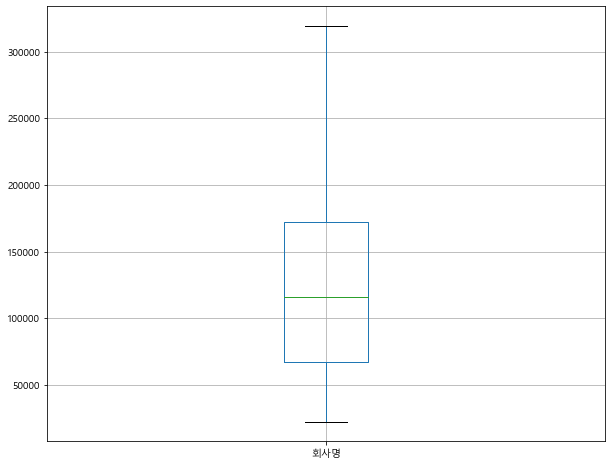

In [134]:
chart1.boxplot(column=[value_name], figsize=(10,8))

In [151]:
company_name = ["샤오미", '다이슨', 'lg전자', '삼성전자', 'DIBEA']
for comany_name in company_name_list:
    ##추후에 print(company-name

SyntaxError: unexpected EOF while parsing (<ipython-input-151-d243520fefc1>, line 3)

In [158]:
chart2 = danawa_data['리뷰수'].value_counts()
print(chart2)

다이슨        21
삼성전자       19
샤오미        14
일렉트로룩스     14
LG전자       13
DIBEA      11
휴스톰         4
경성오토비스      3
아이코넬        1
유니맥스        1
블랙앤데커       1
무궁화전자       1
모온          1
아낙          1
델로라         1
훠링          1
ABKO        1
한경희생활과학     1
오토싱         1
신일산업        1
델첸          1
아이룸         1
머레이         1
원더스리빙       1
카렉스         1
베이스어스       1
테팔          1
일럭스고        1
EUP         1
Name: 리뷰수, dtype: int64


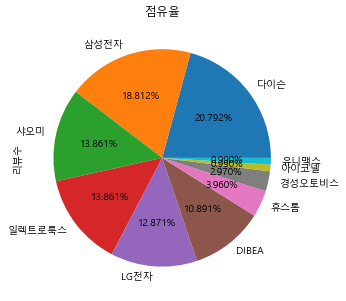

In [159]:
chart2=chart2[:10]
chart2.plot.pie(autopct="%.3f%%", title="점유율", figsize=(5,5))